<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p> -->
# Importing Libraries

In [40]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data</p> -->
# Loading Data

In [41]:
data=pd.read_csv("/kaggle/input/data-set/dataTH1.csv" ,encoding="latin-1",sep=";")
#df=df.drop("id",axis=1)
print(data)

           Ngày       1       2       3       4       5       6       7  \
0    01/01/2021   964.4   964.4   964.4   964.4   964.4   964.4   964.4   
1    01/02/2021  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7  1019.7   
2    01/03/2021   988.4   988.4   988.4   988.4   988.4   988.4   988.4   
3    01/04/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
4    01/05/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
..          ...     ...     ...     ...     ...     ...     ...     ...   
360  27/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
361  28/12/2021  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0  1002.0   
362  29/12/2021  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5  1061.5   
363  30/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   
364  31/12/2021  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6  1022.6   

          8       9  ...      39      40      41      42      43      44  \
0     964.4   964.4  ..

<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data</p> -->
# Lọc cột


In [42]:
msv = 2151264666
col = msv%12 + 1
data_8= data[[str(col)]]
data_8.head(5)

,7
0,964.4
1,1019.7
2,988.4
3,1002.0
4,1061.5


In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [44]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, col]

TÌm cụm tối ưu Kmeans


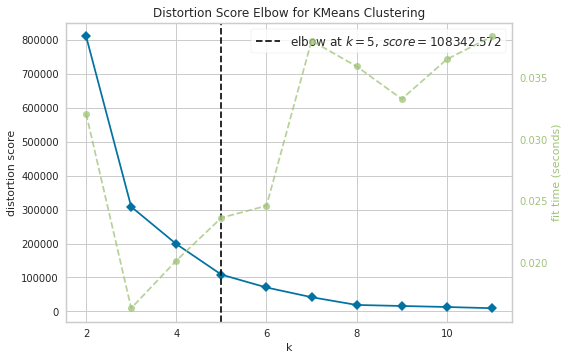

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [46]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values.reshape(-1, 1))
gmm_labels = gmm.predict(selected_data.values.reshape(-1, 1))
# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(selected_data.values.reshape(-1, 1))
# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values.reshape(-1, 1))
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)
# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[2 4 2 4 0 0 0 0 0 2 4 0 0 0 0 0 2 0 0 0 0 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 4 4 0 4 4 4 4
 0 0 0 0 0 2 4 4 4 0 0 0 2 4 0 4 2 4 2 2 4 0 0 0 4 2 2 2 0 0 0 0 0 4 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 4 2 4 2 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 4 2 0 2 2 2 2 2 2 4 0 0 0 0 2 2 2 2 4 4 0 0 2 2 4 4 0 0 0 2 2 2 2 2 2 2 2
 2 0 2 2 4 4 2 2 2 2 0 0 0 2 0 3 1 3 1 3 2 3 3 3 0 2 2 2 2 0 0 0 0 0 2 0 3
 3 3 3 3 3 1 1 3 3 3 3 0 0 3 3 0 0 2 2 4 4 4 2 4 0 4 0 0 0 0 3 0 2 0 0 4 4
 4 4 2 2 4 4 4 2 2 2 2 4 4 4 4 2 2 4 4 2 4 0 4 2 4 0 0 0 4 2 2 4 0 0 0 0 4
 2 4 4 4 2 4 2 2 4 0 4 4 4 2 2 2 4 0 0 0 4 2 0 0 0 0 0 0 2 4 0 4 4 4 2 2 2
 2 4 4 4 2 2 2 4 4 0 0 4 2 4 0 0 0 0 4 2 4 0 4 4 4 4 2 4 4 0 4 4]

KMeans labels:
[4 2 2 2 0 0 0 0 0 4 2 0 0 0 0 0 2 0 0 0 0 0 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 0 2 2 2 2
 0 0 0 0 0 4 2 2 2 0 0 0 4 2 0 2 2 2 2 4 2 0 0 0 2 4 4 4 0 0 0

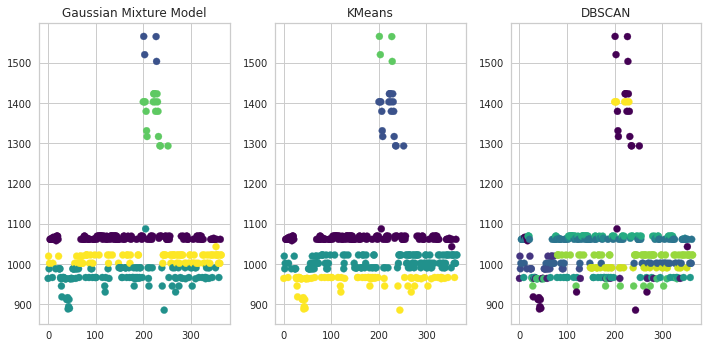

In [47]:
import matplotlib.pyplot as plt
# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(range(len(selected_data)), selected_data, c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(range(len(selected_data)), selected_data, c=kmeans_labels, cmap='viridis')
plt.title('KMeans')
# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(range(len(selected_data)), selected_data, c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()

<!-- [AmbrosM](https://www.kaggle.com/code/ambrosm/tpsjul22-gaussian-mixture-cluster-analysis) suggested some features are just not as useful as others.
> I'll be using all the integer features i.e from **(f_07, ... ,f_13)** & continuos features **(f_22 ,... ,f_28)**. -->

# Feature Selection
> This features are most important features, take a look in my other [kernel](https://www.kaggle.com/code/ashaykatrojwar/feature-selection-eda) to know more about `feature selection`.

In [48]:
feats= ['8']

<!-- # <p style="background-color:#FF7F50;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Scaling Data Data</p> -->
# Preprocessing Data 
> `Power Transformer` makes distribution more gaussian and is most appropriate for this competition.

In [49]:
transformer = PowerTransformer()
X=transformer.fit_transform(df[feats])

KeyError: "None of [Index(['8'], dtype='object')] are in the [columns]"

# Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

`Principal component analysis (PCA)` is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

For this data, I will be reducing the dimensions to **`3`**.

In [ ]:
pca = PCA(n_components=3,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(df[feats]), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Elbow Method to determine optimum number of clusters to be formed:
> `7 clusters` gives the best results on leaderboard.

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

# Bayesian Gaussian Mixture 

In [ ]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)
PCA_ds["Clusters"] = preds
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds


# Creating a classifier
> Training a LGBM model from the clusters predicted from Bayessian Gaussian Mixture

In [ ]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp # creating new dataframe columns of probabilites 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [ ]:
#ricopue's notebook's code snippet
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

In [ ]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [ ]:
labels=np.argmax(lgb_preds,axis=1)


In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'], s=40, c=PCA_ds["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()


In [ ]:
ss.Predicted=np.argmax(lgb_preds,axis=1)

# Ploting the count plot for cluster distribution

In [ ]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
ss.to_csv("submission.csv",index=False)